# Analiza głównych składowych 

In [1]:
import numpy as np
means = [2.13, -99, 0.11, -1.01] # cztery zmienne z innymi średnimi

# Macierz kowariancji
cov_matrix = np.array([[1, 0.96, 0, 0], [0.96, 1, 0, 0], [0, 0, 1, 0.87], [0, 0, 0.87, 1]])
print('Covariance matrix')
print(cov_matrix)

Covariance matrix
[[1.   0.96 0.   0.  ]
 [0.96 1.   0.   0.  ]
 [0.   0.   1.   0.87]
 [0.   0.   0.87 1.  ]]


In [2]:
n=1000 # Liczba wierszy
df = np.random.multivariate_normal(means, cov_matrix, n)
print('Dataframe:')
print(df)

Dataframe:
[[   1.71185306  -99.63621525   -0.39253795   -1.56494983]
 [   1.86347098  -98.92143961    1.03525004    0.553742  ]
 [   0.6092077  -100.93214577    0.59111424   -0.29171401]
 ...
 [   1.65562552  -99.19603733   -0.56870403   -2.23879045]
 [   1.50884449  -99.77892227   -0.51936796   -1.26578654]
 [   3.94597615  -97.26477485    1.76232415   -0.19109663]]


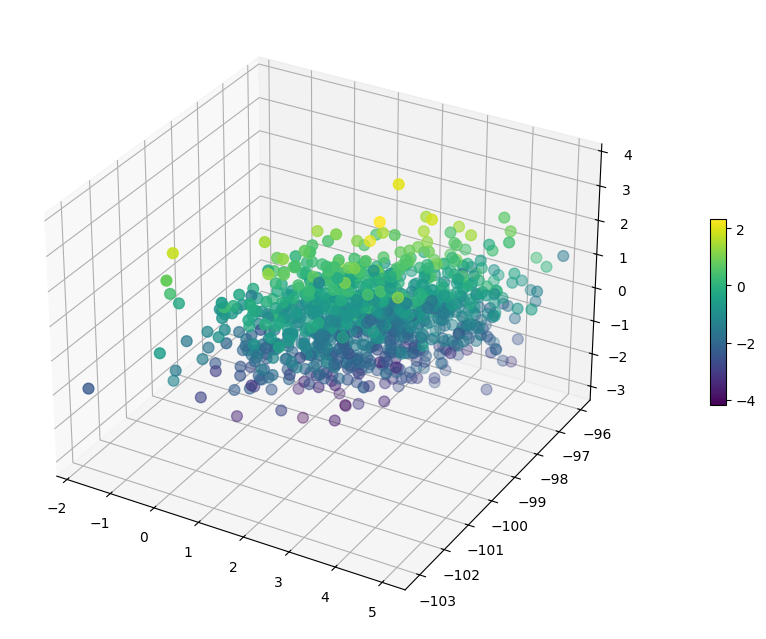

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=df[:,0], ys=df[:,1], zs=df[:,2], c=df[:,3], s=60)
cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02, ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)
plt.show()

## Standaryzacja

In [4]:
# print('Przed standaryzacją')
print('Średnia:\n',df.mean(axis=0))
print('Odchylenie standardowe:\n',df.std(axis=0))

# Standaryzacja
df_standardizated = (df - np.mean(df, axis=0)) / np.std(df, axis=0)

print('\nPo standaryzacji')
print('Średnia:\n',df_standardizated.mean(axis=0))
print('Odchylenie standardowe:\n',df_standardizated.std(axis=0))

Średnia:
 [ 2.19259810e+00 -9.89500722e+01  7.34079261e-02 -1.04631487e+00]
Odchylenie standardowe:
 [1.02523079 1.03000085 0.99904892 1.03318709]

Po standaryzacji
Średnia:
 [ 1.54676272e-15  8.06115175e-14  9.32587341e-18 -8.49209592e-16]
Odchylenie standardowe:
 [1. 1. 1. 1.]


### Utworzenie macierzy kowariancji w oparciu o wystandaryzowaną macierz

In [5]:
covariance_matrix = np.cov(df_standardizated.T)
covariance_matrix

array([[ 1.001001  ,  0.96206141, -0.00419018, -0.00475596],
       [ 0.96206141,  1.001001  , -0.00453182, -0.00103605],
       [-0.00419018, -0.00453182,  1.001001  ,  0.88507959],
       [-0.00475596, -0.00103605,  0.88507959,  1.001001  ]])

## Wektory i Wartości własne

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('Wartości własne:\n',eigenvalues,'\n\nWektory własne:\n',eigenvectors)

Wartości własne:
 [1.96374171 1.885404   0.03888451 0.11597378] 

Wektory własne:
 [[-0.70409648 -0.06514576  0.70684917 -0.01919458]
 [-0.70398218 -0.06643399 -0.70687267  0.01807315]
 [ 0.06634799 -0.70398405 -0.01798754 -0.70688107]
 [ 0.06523176 -0.70409446  0.0192802   0.70684091]]


## Wyjaśniona wariancja 

In [7]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)

[0.49, 0.471, 0.029, 0.01]


## Transformacja cech

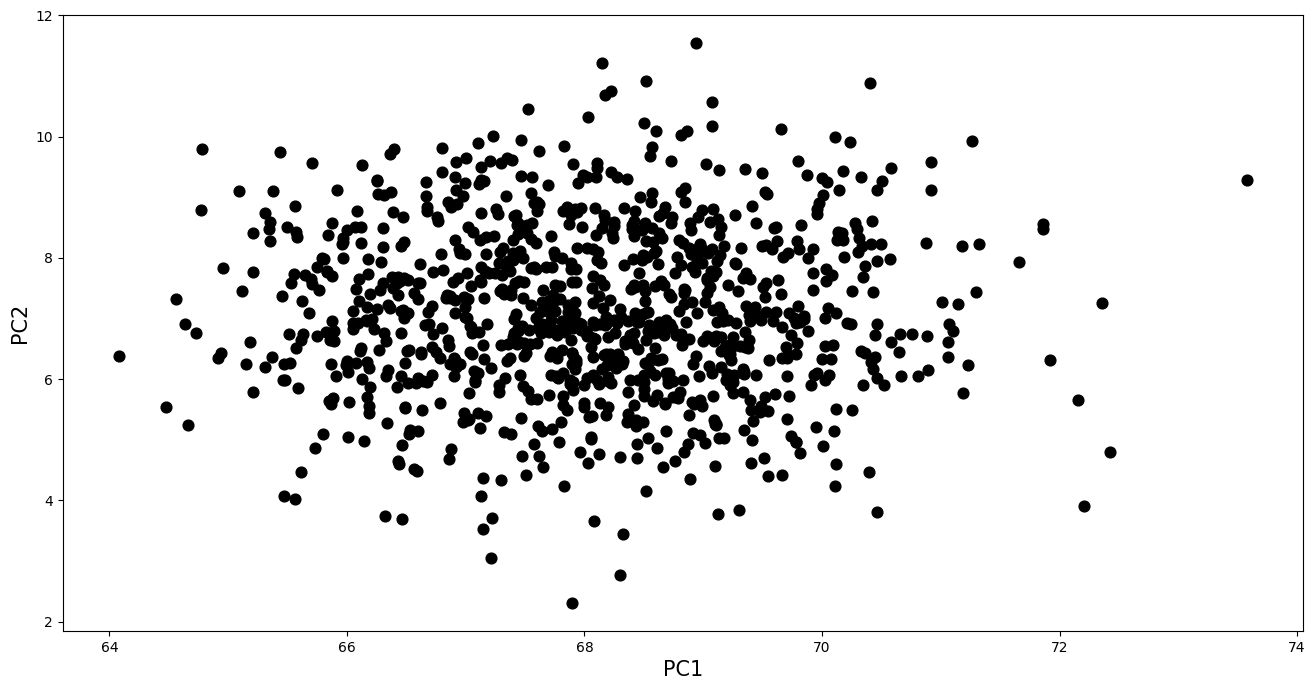

In [8]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)
w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))
pc1 = df.dot(w.T[0])
pc2 = df.dot(w.T[1])
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(x=pc1, y=pc2, c='black', s=60)
ax.set_xlabel(xlabel='PC1', rotation=0, loc='center', size=15)
ax.set_ylabel(ylabel='PC2', rotation=90, loc='center', size=15)
plt.show()

# PCA - zastosowanie

In [9]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
import seaborn as sns

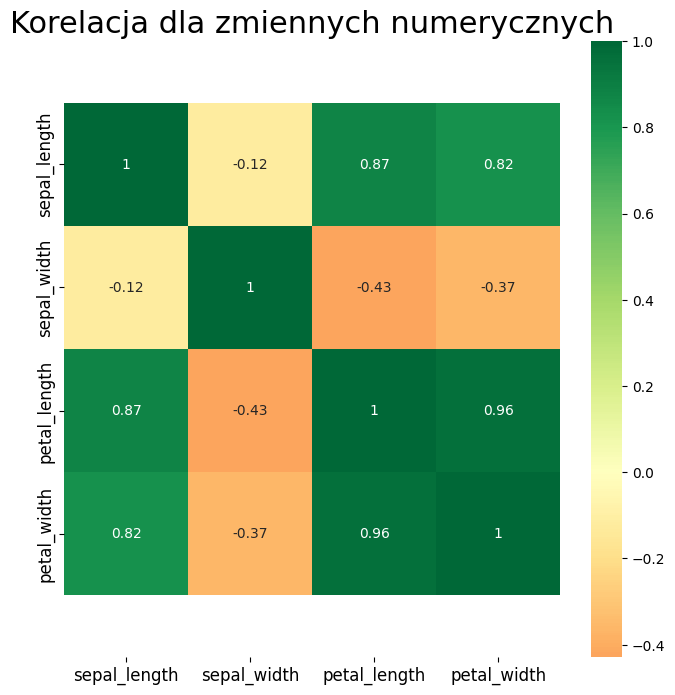

In [13]:
X = iris.copy().drop(columns=['species'])
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##  Wizualizacja

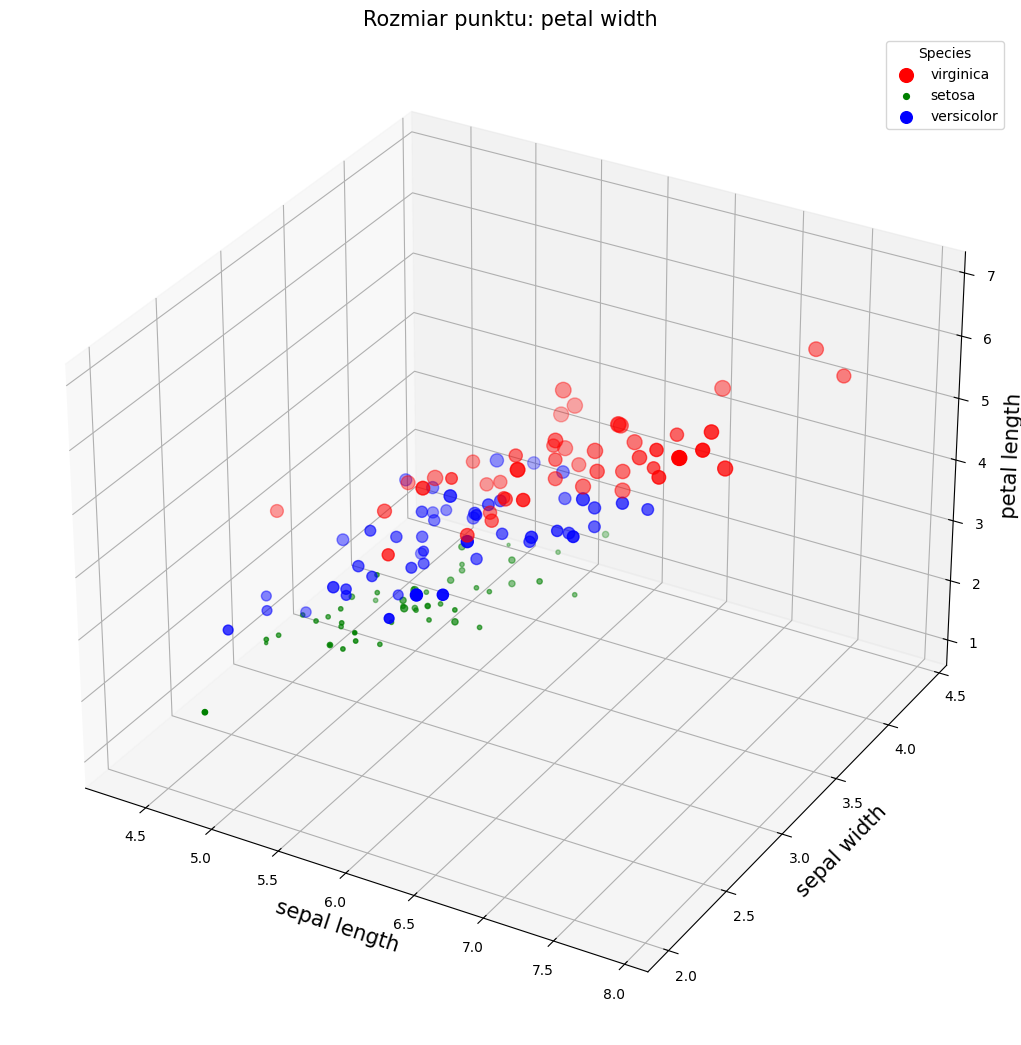

In [14]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=iris.loc[iris['species']=='virginica', 'sepal_length'],
                 ys=iris.loc[iris['species']=='virginica','sepal_width'],
                 zs=iris.loc[iris['species']=='virginica', 'petal_length'],
                 s=iris.loc[iris['species']=='virginica','petal_width']*50,
                 c='red', label='virginica')
img = ax.scatter(xs=iris.loc[iris['species']=='setosa', 'sepal_length'],
                 ys=iris.loc[iris['species']=='setosa','sepal_width'],
                 zs=iris.loc[iris['species']=='setosa', 'petal_length'],
                 s=iris.loc[iris['species']=='setosa','petal_width']*50,
                 c='green', label='setosa')
img = ax.scatter(xs=iris.loc[iris['species']=='versicolor', 'sepal_length'],
                 ys=iris.loc[iris['species']=='versicolor','sepal_width'],
                 zs=iris.loc[iris['species']=='versicolor', 'petal_length'],
                 s=iris.loc[iris['species']=='versicolor','petal_width']*50,
                 c='blue', label='versicolor')
ax.set_xlabel(xlabel='sepal length', size=15)
ax.set_ylabel(ylabel='sepal width', size=15)
ax.set_zlabel(zlabel='petal length', size=15)
ax.set_title('Rozmiar punktu: petal width', size=15)
plt.legend(title='Species')
plt.show()


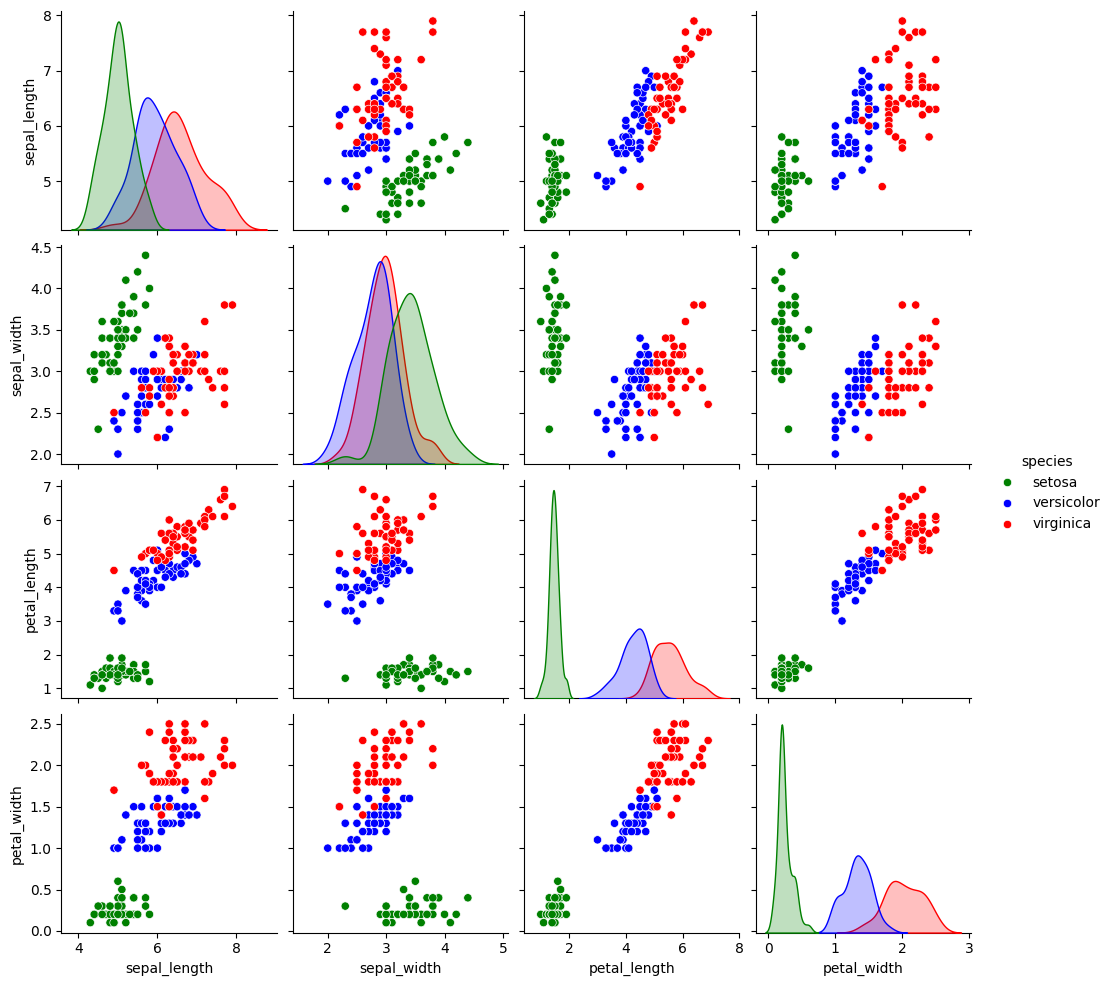

In [15]:
sns.pairplot(iris,
             hue='species',
             palette={'virginica': 'red', 'setosa': 'green', 'versicolor': 'blue'})
plt.show()

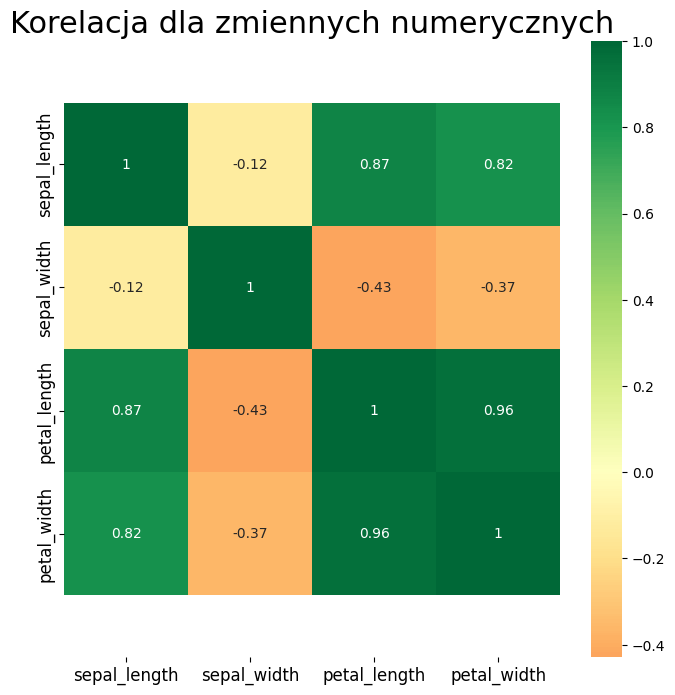

In [16]:
X = iris.copy().drop(columns=['species'])
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = iris.drop('species', axis=1).copy()
y = iris['species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_iris = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
# train_iris = train_iris.drop(4, axis=1).copy()
train_iris.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'species'},
                  inplace=True)
train_iris[['PC1', 'PC2','PC3','PC4']] = train_iris[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_iris.corr()

ValueError: could not convert string to float: 'setosa'

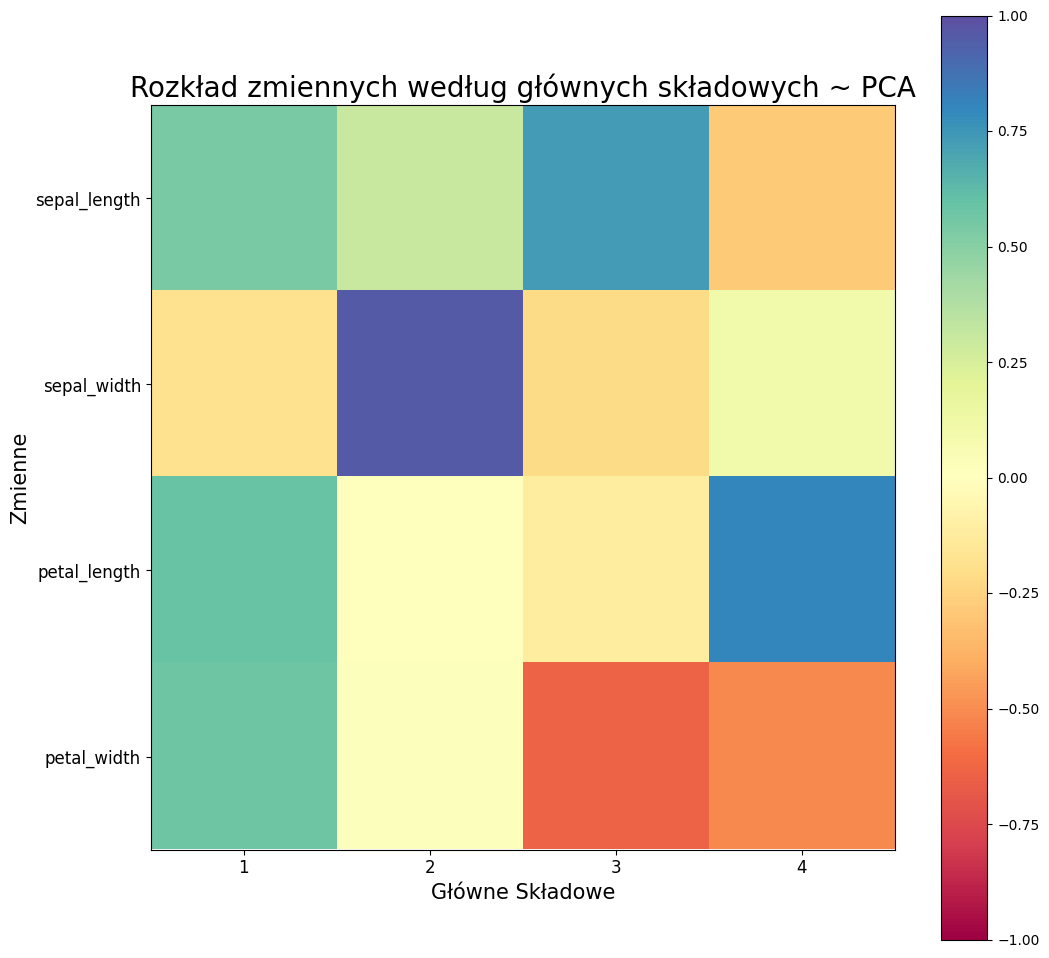

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

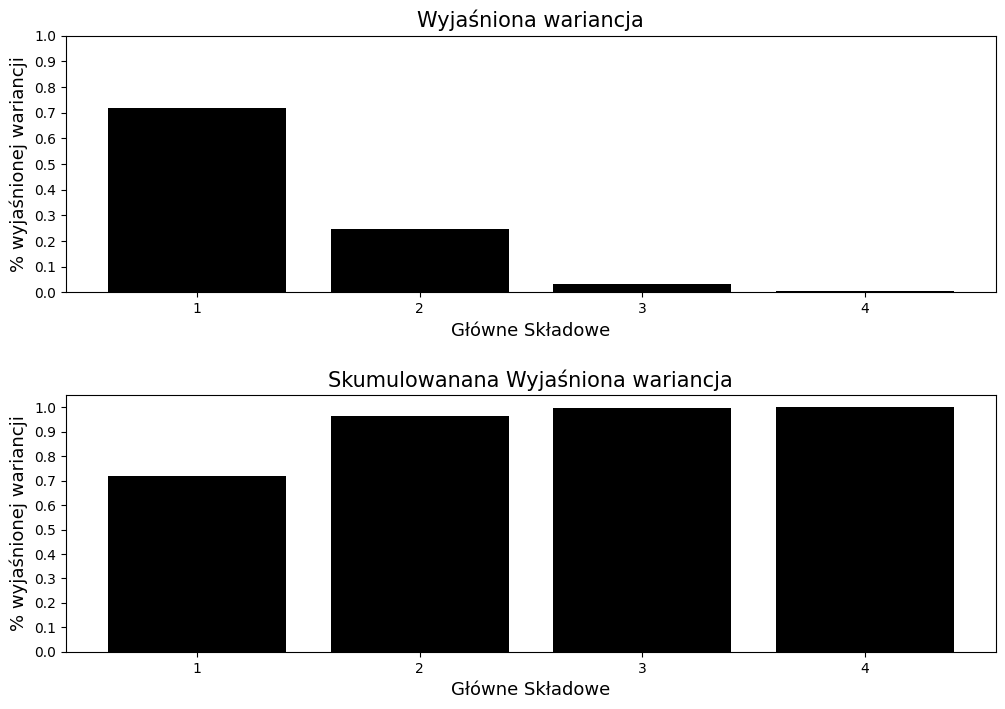

Główna składowa: 1, Wyjaśniona wariancja: 0.71702, Skumulowana Wyjaśniona wariancja: 0.71702
Główna składowa: 2, Wyjaśniona wariancja: 0.24713, Skumulowana Wyjaśniona wariancja: 0.96415
Główna składowa: 3, Wyjaśniona wariancja: 0.03156, Skumulowana Wyjaśniona wariancja: 0.99572
Główna składowa: 4, Wyjaśniona wariancja: 0.00428, Skumulowana Wyjaśniona wariancja: 1.0


In [19]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

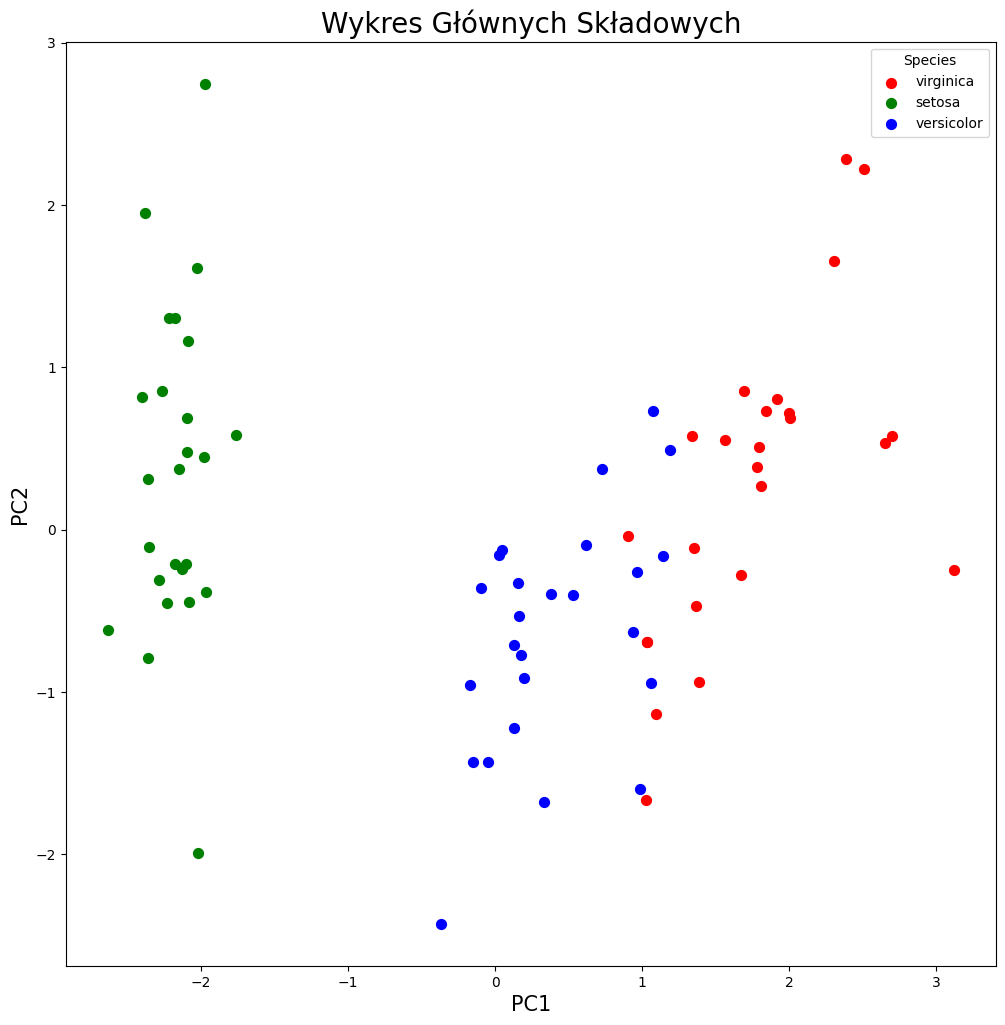

In [20]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_iris.loc[train_iris['species']=='virginica', 'PC1'],
            y=train_iris.loc[train_iris['species']=='virginica','PC2'],
            c='red', label='virginica', s=50)
plt.scatter(x=train_iris.loc[train_iris['species']=='setosa', 'PC1'],
            y=train_iris.loc[train_iris['species']=='setosa','PC2'],
            c='green', label='setosa', s=50)
plt.scatter(x=train_iris.loc[train_iris['species']=='versicolor', 'PC1'],
            y=train_iris.loc[train_iris['species']=='versicolor','PC2'],
            c='blue', label='versicolor', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9467   |             10767              |
|   Skalowane dane  |   0.9467   |              1478              |
|        4 PC       |   0.9467   |              1355              |
|        3 PC       |   0.9467   |              2030              |
|        2 PC       |   0.9067   |              1675              |
|        1 PC       |   0.9067   |              1238              |
+-------------------+------------+--------------------------------+
